# Objective

### The aim of this analysis to perform 2 main tasks:
### 1) Axis Projection of Users
### 2) Unsupervised Learning - Heirarchical Clustering to be precise 

The Data input that we have is from the SQL database dump. The input files are '2.csv'(which consists user level text entered for simulation of games run) and 'Analytics - Axis Mappings.xlsx'

By Simulation, each user has input their approaches when reacting to a specific scenariio in their organization. This is where '2.csv' is derived from 

The 'Analytics - Axis Mappings.xlsx' consisits of words and the mapping of these words indicating onto which of the following axis do they fall. Some may fall on 2 axis as well:

Competitve Approach

Colloborative Approach 

Stability Approach 

Change Approach 


### 1) Axis Projection of Users: 

This is a use case to understand how the users fare when projected onto a 2-D axis with X-axis consisting of 'Competiititve - Colloborative' Score and the Y-Axis consisting of 'Stability' vs 'Change' Focus Users. 

This projection would help us undersand how the users behave in a corporate environment. This helps managers, senior management and Human Resource personnal to identify users implementing specific practices. This is from the inputs


### 2) Heirarachical Clustering:

This utilizes the cleaning and word embedding techniques as in step-1 and clusters users to see patterns. Heirarchical Clustering is implemented to visualize the clusters. Other approaches such as DBScan, K_Means were performed but are unpublished here

# Importing Packages 

# Importing Stop Words from NLTK 



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
## Adding in some more useful packages here
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
#stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Working Directory

## Change this accordingly

In [2]:
os.getcwd()
os.chdir('C:\\Users\\vamsi\\Downloads\\Anjana')

# Here the FIle names '2.csv' is the output that we get from the SQL Queries:

SELECT Message FROM GameNotes gn
join GameMoves gm
on gm.Id = gn.Id
where gm.GameId = '<GAMEID>';

SELECT gm.GameId, ga.Description, ga.CustomActionName, ga.Story FROM GameActions ga
join GameMoves gm
on gm.Id = ga.GameMoveId
where gm.GameId = '<GAMEID>';

SELECT Description FROM GameTargetOperatingPlans gtop
JOIN GameOperatingPlans gop
on gop.Id = gtop.GameOperatingPlanId
where gop.GameId = '<GAMEID>';

In [3]:
dt = pd.read_csv('2.csv')

In [4]:
dt.head()

,usr,GameId,Description,CustomActionName,Story
0,ce7f1b30-60e3-11e9-b399-bdb07e903a85,19cdccc0-6126-11e9-8baa-05bd5073fa5d,For personal branding and to create an interes...,NaN,NaN
1,c8045430-d58e-11e9-b608-8796c3108e7c,f901c6c0-d6a2-11e9-b608-8796c3108e7c,provide a good reason for the action,NaN,NaN
2,4cc2ed30-d805-11e9-b608-8796c3108e7c,10a1e0b0-1133-11ea-b316-2ddd841a27d3,this will be best use of their time,NaN,NaN
3,2beaf820-60e4-11e9-b399-bdb07e903a85,402044f0-612d-11e9-8baa-05bd5073fa5d,Seems to be the best option,NaN,best use cases will deliver most trust
4,4cc2ed30-d805-11e9-b608-8796c3108e7c,d560ecf0-1126-11ea-b316-2ddd841a27d3,to demonstrate that i am in control of my port...,NaN,NaN


# Here the Glove Vector is read as a 50 DImensional Vector

In [6]:
f = open('C:\\Users\\vamsi\\Downloads\\glove.6B\\glove.6B.50d.txt')

In [7]:
type(f)

_io.TextIOWrapper

In [8]:
with open('C:\\Users\\vamsi\\Downloads\\glove.6B\\glove.6B.50d.txt', 'r',encoding="utf8") as f2:
    data = f2.read()
    print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
type(data)

str

# Checking the Vector

## One can see how the vector for the word 'the' is present 

In [12]:
data[0:50]

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.04445'

## Similarly the next part of the data string

In [14]:
data[51:100]

' -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0'

# Retrieving the User_id listed as 'usr' and the input words 'Description' for each instance

In [17]:
df= dt[['usr','Description']]
df

,usr,Description
0,ce7f1b30-60e3-11e9-b399-bdb07e903a85,For personal branding and to create an interes...
1,c8045430-d58e-11e9-b608-8796c3108e7c,provide a good reason for the action
2,4cc2ed30-d805-11e9-b608-8796c3108e7c,this will be best use of their time
3,2beaf820-60e4-11e9-b399-bdb07e903a85,Seems to be the best option
4,4cc2ed30-d805-11e9-b608-8796c3108e7c,to demonstrate that i am in control of my port...
...,...,...
817,4129f6f0-60e4-11e9-b399-bdb07e903a85,"If the meeting went well, there is a chance th..."
818,7d5a66b0-60e3-11e9-b399-bdb07e903a85,Need to do more research on this subject.
819,a48ad9b0-d805-11e9-b608-8796c3108e7c,Understanding the real problem might open up o...
820,a89ea510-60e4-11e9-b399-bdb07e903a85,grow digital revenue for the account


# Getting all the descriprions as a Corpus for further cleaning

In [18]:
rows,columns=df.shape

list_text=[] #your empty list 
for index in range(rows): #iteration over the dataframe
    list_text.append(df.iat[index,1])

print(list_text)

['For personal branding and to create an interest within the account.', 'provide a good reason for the action', 'this will be best use of their time', 'Seems to be the best option', 'to demonstrate that i am in control of my portfolio', 'research and preparation more likely to get results', 'Receive advice while working as a team to make the sale', 'understand their priorities if not marketing automation', 'Know your client and prospect for upcoming quarter', 'They have more resources to quickly create a better proposal', 'this is a robust project that will need all hands on deck', 'Seek first to understand.', 'Understand clients perspective before justifying rates. This will allow the client to feel understood and considered and my responses will be perceived as informed responses rather than generic.', 'cymorgcymorgcymorgcymorgcymorgcymorgcymorg', 'Its always better to put the solution in context.', 'ensure client Infosys is staying relevant', 'To leverage the relationship with the c

# The first item of the list within the corpus

In [19]:
list_text[0]

'For personal branding and to create an interest within the account.'

In [21]:
list_text[2]

'this will be best use of their time'

# The command below groups the descriptions at User level. If the first user had 8 Descriptions in 'df', all the 8 descriptions appear in the same cell here in the 't' separated by commas

In [24]:
t= df.groupby('usr').agg({
    'Description': lambda x: ', '.join(x)
})

# Shows that there are 41 unique users

In [27]:
t.shape

(41, 1)

In [28]:
t

,Description
usr,
0096bec0-60e4-11e9-b399-bdb07e903a85,"we need to beat the competition, we need to ma..."
0427d960-d804-11e9-b608-8796c3108e7c,"well this is to gain confidence of client, it ..."
0dc04010-d805-11e9-b608-8796c3108e7c,It is a case of single point of failure. While...
0fa74af0-60e5-11e9-b399-bdb07e903a85,"It makes more sense and seems more convincing,..."
161bbcb0-60e3-11e9-b399-bdb07e903a85,"Networking internally is the key to success, G..."
163087c0-60e4-11e9-b399-bdb07e903a85,"Do a value proposition before Pricing., A proa..."
1a8f5130-60e8-11e9-b399-bdb07e903a85,Look to add value to client. Reiterate that it...
205b1c50-60e5-11e9-b399-bdb07e903a85,"To build relationships., To demonstrate to the..."
29064430-60e3-11e9-b399-bdb07e903a85,"Clients needs come first and foremost., Being ..."


# Cleaning the descriptions:

### Splitting the Description

### Removing Stop Words 

### Arranging them in a single cell again

## We finally have the 'Clean_Desc' column after the descriptions have gone through the above 3 filters/process/steps 

In [30]:
t['Clean_Desc'] = t['Description'].str.lower().str.split()

In [31]:
stop = stopwords.words('english')

In [32]:
t['Clean_Desc'] = t['Clean_Desc'].apply(lambda x: [item for item in x if item not in stop])

In [33]:
t

,Description,Clean_Desc
usr,,
0096bec0-60e4-11e9-b399-bdb07e903a85,"we need to beat the competition, we need to ma...","[need, beat, competition,, need, make, client,..."
0427d960-d804-11e9-b608-8796c3108e7c,"well this is to gain confidence of client, it ...","[well, gain, confidence, client,, imporatn, po..."
0dc04010-d805-11e9-b608-8796c3108e7c,It is a case of single point of failure. While...,"[case, single, point, failure., work, backgrou..."
0fa74af0-60e5-11e9-b399-bdb07e903a85,"It makes more sense and seems more convincing,...","[makes, sense, seems, convincing,, best, scena..."
161bbcb0-60e3-11e9-b399-bdb07e903a85,"Networking internally is the key to success, G...","[networking, internally, key, success,, going,..."
163087c0-60e4-11e9-b399-bdb07e903a85,"Do a value proposition before Pricing., A proa...","[value, proposition, pricing.,, proactive, app..."
1a8f5130-60e8-11e9-b399-bdb07e903a85,Look to add value to client. Reiterate that it...,"[look, add, value, client., reiterate, respons..."
205b1c50-60e5-11e9-b399-bdb07e903a85,"To build relationships., To demonstrate to the...","[build, relationships.,, demonstrate, client, ..."
29064430-60e3-11e9-b399-bdb07e903a85,"Clients needs come first and foremost., Being ...","[clients, needs, come, first, foremost.,, ethi..."


# Converting the 'usr' as index into a column

In [34]:
t['usr'] = t.index

In [35]:
t.head()

,Description,Clean_Desc,usr
usr,,,
0096bec0-60e4-11e9-b399-bdb07e903a85,"we need to beat the competition, we need to ma...","[need, beat, competition,, need, make, client,...",0096bec0-60e4-11e9-b399-bdb07e903a85
0427d960-d804-11e9-b608-8796c3108e7c,"well this is to gain confidence of client, it ...","[well, gain, confidence, client,, imporatn, po...",0427d960-d804-11e9-b608-8796c3108e7c
0dc04010-d805-11e9-b608-8796c3108e7c,It is a case of single point of failure. While...,"[case, single, point, failure., work, backgrou...",0dc04010-d805-11e9-b608-8796c3108e7c
0fa74af0-60e5-11e9-b399-bdb07e903a85,"It makes more sense and seems more convincing,...","[makes, sense, seems, convincing,, best, scena...",0fa74af0-60e5-11e9-b399-bdb07e903a85
161bbcb0-60e3-11e9-b399-bdb07e903a85,"Networking internally is the key to success, G...","[networking, internally, key, success,, going,...",161bbcb0-60e3-11e9-b399-bdb07e903a85


# Checking the first cell of t and how the cleaning worked 

In [36]:
t['Clean_Desc'][0]

['need',
 'beat',
 'competition,',
 'need',
 'make',
 'client',
 'happy,',
 'follow',
 'instructions',
 'close',
 'deal',
 'get',
 'sale,',
 'increase',
 'digital',
 'presence',
 'grow',
 'future,',
 'team',
 'needs',
 'get',
 'stuff',
 'together',
 'start',
 'delivering',
 'top',
 'notch',
 'work,',
 'consultant',
 'allow',
 'give',
 'credibility,',
 'close',
 'sale',
 'grow',
 'business,',
 'need',
 'articulate',
 'service',
 'must',
 'have,',
 'lets',
 'get',
 'answers,',
 'keep',
 'excitement',
 'going,',
 'improve',
 'client',
 'relationship',
 'number',
 'one',
 'priortiy,',
 'need',
 'close',
 'deals,',
 'want',
 'lose',
 'area',
 'business',
 'competition,',
 'improve',
 'client',
 'satisfaction']

# Splitting Glove Vector 

In [47]:
glov.columns=['key']
glov4=[[]]
glov4=glov.key.str.split(" ",expand=True)
glov4.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,the,0.418,0.24968,-0.41242,0.1217,0.34527,-0.044457,-0.49688,-0.17862,-0.00066023,...,-0.29871,-0.15749,-0.34758,-0.045637,-0.44251,0.18785,0.0027849,-0.18411,-0.11514,-0.78581
1,",",0.013441,0.23682,-0.16899,0.40951,0.63812,0.47709,-0.42852,-0.55641,-0.364,...,-0.080262,0.63003,0.32111,-0.46765,0.22786,0.36034,-0.37818,-0.56657,0.044691,0.30392
2,.,0.15164,0.30177,-0.16763,0.17684,0.31719,0.33973,-0.43478,-0.31086,-0.44999,...,-6.3681e-05,0.068987,0.087939,-0.10285,-0.13931,0.22314,-0.080803,-0.35652,0.016413,0.10216
3,of,0.70853,0.57088,-0.4716,0.18048,0.54449,0.72603,0.18157,-0.52393,0.10381,...,-0.34727,0.28483,0.075693,-0.062178,-0.38988,0.22902,-0.21617,-0.22562,-0.093918,-0.80375
4,to,0.68047,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,...,-0.094375,0.018324,0.21048,-0.03088,-0.19722,0.082279,-0.09434,-0.073297,-0.064699,-0.26044


# Mapping the Glove vector we loaded earlier to each word in t at each cell level

## We can see how the first cell of f1 looks like

In [48]:
f1=[]
for i in range(len(t)):
    g1 = pd.DataFrame(t['Clean_Desc'][i])
    g1[0] = g1[0].str.replace(",","").astype(str)
    g1[0] = g1[0].str.replace(".","").astype(str)
    d1= g1.merge(glov4, how = 'left', left_on = 0, right_on =0)
    f1.append(d1)
f1[0]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,need,0.41495,0.11293,0.45591,-0.51796,0.3896,-0.21307,-0.10788,-0.11875,0.15723,...,-0.17842,-0.20283,0.34743,0.52291,0.29194,0.47418,-0.04308,0.77093,-0.27575,0.57742
1,beat,-1.5236,-0.26458,0.27174,0.82746,-0.098719,0.040697,-0.56075,1.149,-1.0156,...,0.66559,0.030266,0.42841,-0.76773,0.90456,1.4282,-0.34382,-0.84619,0.35737,-0.35665
2,competition,-0.92647,0.22276,-0.94758,0.79998,-0.95074,0.21957,-0.070951,0.17154,0.4267,...,-0.34568,-0.40406,0.37123,0.13692,0.050289,0.056323,0.25236,-0.13194,0.15537,0.049479
3,need,0.41495,0.11293,0.45591,-0.51796,0.3896,-0.21307,-0.10788,-0.11875,0.15723,...,-0.17842,-0.20283,0.34743,0.52291,0.29194,0.47418,-0.04308,0.77093,-0.27575,0.57742
4,make,0.55494,-0.048714,0.07152,-0.071538,0.4115,0.18034,-0.48436,-0.03592,-0.15302,...,-0.21028,0.1189,0.30614,0.32978,0.11962,0.30695,-0.18082,0.4535,-0.086564,0.40418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,business,0.023693,0.13316,0.023131,0.49833,0.026874,-0.43252,-1.1364,-0.82001,0.22388,...,-0.0961,-0.28523,0.30047,0.50902,0.081356,-0.015639,-0.51021,0.34585,0.24201,0.82237
60,competition,-0.92647,0.22276,-0.94758,0.79998,-0.95074,0.21957,-0.070951,0.17154,0.4267,...,-0.34568,-0.40406,0.37123,0.13692,0.050289,0.056323,0.25236,-0.13194,0.15537,0.049479
61,improve,-0.047477,0.058463,0.22008,-0.10927,-0.42049,-0.38802,-0.053844,-0.18693,0.80414,...,-0.64961,-0.82258,0.59129,-0.24122,0.20567,0.20778,0.11749,0.65546,0.39076,0.48524
62,client,0.70974,0.0045474,0.37949,0.97057,1.0858,-0.1359,-0.12119,0.40195,0.023068,...,1.2141,-0.044937,-0.018216,1.3573,-0.24759,-0.84961,-0.45532,0.23328,0.022799,0.86853


# Getting the User as the column name 'col'

In [49]:
q=pd.DataFrame()
for i in range(0,len(f1)):
    c=pd.DataFrame(f1[i])
    c['col']=i
    q=pd.concat([c, q], ignore_index=True)
q.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,col
0,demonstrate,0.34473,0.16382,-0.084255,-0.43555,0.42197,-0.1864,0.64198,0.28809,0.2429,...,-0.77875,0.013739,0.10629,0.28862,-0.14522,0.10555,0.82612,-0.25811,-0.20999,40
1,leadership,-0.060184,0.19573,0.046868,-0.33762,0.68805,-0.092162,0.30626,0.18123,-0.74315,...,-0.37206,-1.1617,0.14378,-0.14107,0.0081431,-0.71861,0.59349,-0.46446,0.13628,40
2,offering,0.82859,0.77203,-0.036755,-0.064754,0.1481,-0.15758,-1.044,-0.45777,0.19691,...,-0.063948,0.067461,0.70938,-0.052076,-0.36944,-0.21007,0.9011,-0.14999,0.28321,40
3,help,0.88189,-0.07336,0.7171,-0.39262,0.24097,-0.13752,-0.61264,0.32193,0.4621,...,-0.011288,0.44917,-0.39481,0.60444,0.25558,-0.072523,0.1774,-0.15583,0.11012,40
4,discuss,1.0633,0.71096,-0.74493,0.47339,0.020557,-0.17197,-0.29832,0.14057,-0.2679,...,0.059681,0.42262,-0.38416,0.69403,0.39803,0.076495,1.7818,-0.38797,0.23546,40


# Euclidean Distance Calculation of the vectors

In [50]:
f2= q.iloc[:,1:51]
f2= f2.astype(float)
f3=np.power(f2, 2)
f3.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.118839,0.026837,0.007099,0.189704,0.178059,0.034745,0.412138,0.082996,0.059000,0.488349,...,0.011017,0.606452,0.000189,0.011298,0.083302,0.021089,0.011141,0.682474,0.066621,0.044096
1,0.003622,0.038310,0.002197,0.113987,0.473413,0.008494,0.093795,0.032844,0.552272,0.291373,...,0.405374,0.138429,1.349547,0.020673,0.019901,0.000066,0.516400,0.352230,0.215723,0.018572
2,0.686561,0.596030,0.001351,0.004193,0.021934,0.024831,1.089936,0.209553,0.038774,0.834318,...,0.322624,0.004089,0.004551,0.503220,0.002712,0.136486,0.044129,0.811981,0.022497,0.080208
3,0.777730,0.005382,0.514232,0.154150,0.058067,0.018912,0.375328,0.103639,0.213536,0.011044,...,0.207900,0.000127,0.201754,0.155875,0.365348,0.065321,0.005260,0.031471,0.024283,0.012126
4,1.130607,0.505464,0.554921,0.224098,0.000423,0.029574,0.088995,0.019760,0.071770,0.373064,...,0.616178,0.003562,0.178608,0.147579,0.481678,0.158428,0.005851,3.174811,0.150521,0.055441


# Euclidean Distance continued..

In [54]:
f3['Sum']=f3.sum(axis=1)
f3['RootofSq']= np.power(f3['Sum'], 0.5)

# We can see how the Dataframe of mapping gets the Euclidean Distance at User and Word user of that user level

## Col : User
## Word_Used: Word used by the user which is part of Description 
## Sum: Euclidean Distance 

In [55]:
mapping = pd.concat([q.iloc[:,0], f3.iloc[:,50]], axis=1)
mapping = pd.concat([q.iloc[:,51], mapping], axis=1)
mapping = mapping.rename(columns={0: 'Word_Used'})
mapping.head()

,col,Word_Used,Sum
0,40,demonstrate,17.583123
1,40,leadership,25.855878
2,40,offering,22.196314
3,40,help,29.445890
4,40,discuss,27.433312


# Defi is the definition file from the inbuilt definitions

In [57]:
defi=pd.read_excel('Cymorg Analytics - Axis Mappings.xlsx', index_col=0,sheet_name='Sheet1')  
defi.head()

,Tag,Axis,Score
Word,,,
avoidance,Competitive,X,1
oppositional,Competitive,X,1
power,Competitive,X,1
competitive,Competitive,X,1
perfectionistic,Competitive,X,1


# Mapping the every combination of the Word_Used with Word from Defi

In [58]:
defi['Word']=defi.index
mapping['key'] = 0
defi['key'] = 0
cross= mapping.merge(defi, how='outer')
cross.head()

,col,Word_Used,Sum,key,Tag,Axis,Score,Word
0,40,demonstrate,17.583123,0,Competitive,X,1,avoidance
1,40,demonstrate,17.583123,0,Competitive,X,1,oppositional
2,40,demonstrate,17.583123,0,Competitive,X,1,power
3,40,demonstrate,17.583123,0,Competitive,X,1,competitive
4,40,demonstrate,17.583123,0,Competitive,X,1,perfectionistic


# We see that there are about 529K combinations

In [59]:
cross.shape

(528660, 8)

# Importing Packages relevant to String Matching

## The objective is to get the best string mapping for the 'Word_Used' with 'Word'

In [60]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\vamsi\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [61]:
e=[]
for i in range(0,len(cross)):
    e.append(fuzz.ratio(cross['Word_Used'][i],cross['Word'][i]))
e= pd.DataFrame(e)

cross=pd.concat([cross, e] ,axis=1)
cross.rename(columns={0:'Score'})
cross.head()

,col,Word_Used,Sum,key,Tag,Axis,Score,Word,0
0,40,demonstrate,17.583123,0,Competitive,X,1,avoidance,20
1,40,demonstrate,17.583123,0,Competitive,X,1,oppositional,26
2,40,demonstrate,17.583123,0,Competitive,X,1,power,25
3,40,demonstrate,17.583123,0,Competitive,X,1,competitive,36
4,40,demonstrate,17.583123,0,Competitive,X,1,perfectionistic,38


# For every Word_Used the maximum string match 

In [65]:
cross.loc[:, ['col', 'Word_Used'] ].groupby(['Word_Used']).max().tail()

,col
Word_Used,
yet,6
yo!,8
you,4
yourself,10
zoom,32


In [86]:
cross['RN'] = cross.groupby(["col","Word_Used"])[0].rank(method="first", ascending=False)

In [87]:
cross.head()

,col,Word_Used,Sum,key,Tag,Axis,Score,Word,0,RN
0,40,demonstrate,17.583123,0,Competitive,X,1,avoidance,20,71.0
1,40,demonstrate,17.583123,0,Competitive,X,1,oppositional,26,49.0
2,40,demonstrate,17.583123,0,Competitive,X,1,power,25,52.0
3,40,demonstrate,17.583123,0,Competitive,X,1,competitive,36,18.0
4,40,demonstrate,17.583123,0,Competitive,X,1,perfectionistic,38,12.0


# Filtering Only for Top Matches

In [88]:
cross1 = cross[cross['RN']==1]
cross1.shape

(4370, 10)

In [89]:
cross1.head()

,col,Word_Used,Sum,key,Tag,Axis,Score,Word,0,RN
87,40,demonstrate,17.583123,0,Change,Y,-1,strategy,63,1.0
116,40,leadership,25.855878,0,Colloborative,X,-1,partnership,67,1.0
257,40,offering,22.196314,0,Change,Y,-1,learning,62,1.0
355,40,help,29.445890,0,Change,Y,-1,develop,55,1.0
409,40,discuss,27.433312,0,Stability,Y,1,results,43,1.0


In [150]:
cross2 = cross1.pivot_table('Sum', index=['col'],columns=['Axis','Score'], aggfunc='mean',dropna=False)
cross2= pd.DataFrame(cross2)
cross2.head()

Axis           X                     Y           
Score         -1          1         -1          1
col                                              
0      26.047312  26.843715  23.981638  20.878516
1      17.068637  20.026550  15.074338  21.445382
2      23.310188  20.654266  24.405777  22.626940
3      24.295282  27.715807  21.859199  21.703531
4      24.482036  28.820276  25.930324  22.581250

# Calculating Co-Ordinates

## X-Co is the calculated X-Coordinate
## Y-Co is the calculated Y-Coordinate

In [157]:
cross2['X-Co']=''
cross2['Y-Co']=''

a=[]
for i in range(0,len(cross2)):
    b=cross2.iloc[i][0]*-1 + cross2.iloc[i][1]*1
    a.append(b)
#a= pd.DataFrame(a)

r=[]
for i in range(0,len(cross2)):
    b=cross2.iloc[i][2]*-1 + cross2.iloc[i][3]*1
    r.append(b)
#a= pd.DataFrame(a)
cross2['X-Co']= a
cross2['Y-Co']= r
cross2

Axis           X                     Y                  X-Co       Y-Co
Score         -1          1         -1          1                      
col                                                                    
0      26.047312  26.843715  23.981638  20.878516   0.796403  -3.103122
1      17.068637  20.026550  15.074338  21.445382   2.957914   6.371044
2      23.310188  20.654266  24.405777  22.626940  -2.655922  -1.778837
3      24.295282  27.715807  21.859199  21.703531   3.420525  -0.155667
4      24.482036  28.820276  25.930324  22.581250   4.338241  -3.349074
5      22.980746  24.043614  23.846278  23.231895   1.062868  -0.614383
6      24.237259  23.269645  23.049016  24.069043  -0.967614   1.020027
7      22.980905  23.714920  25.079744  23.167040   0.734015  -1.912704
8      24.274483  24.429885  23.910808  23.976033   0.155402   0.065225
9      13.667522  24.807486  22.487861  11.348348  11.139965 -11.139514
10     23.347005  24.701617  24.598011  23.970689   1.354612  -0.627321
11     24.680649  17.641530  24.439257  22.459545  -7.039118  -1.979713
12     25.147821  23.228969  24.475290  24.139176  -1.918852  -0.336113
13     23.803126  18.346527  22.780019  22.737294  -5.456599  -0.042724
14     23.602785  24.793118  24.356497  24.287913   1.190333  -0.068584
15     22.575934  24.351386  23.772582  20.192832   1.775452  -3.579750
16     23.197537  25.574565  22.497048  24.273221   2.377027   1.776173
17     25.516459  24.014610  23.607494  23.207499  -1.501849  -0.399995
18     23.245637  20.572522  24.241485  22.807770  -2.673115  -1.433715
19     22.811060  24.622069  23.266719  24.128739   1.811009   0.862020
20     23.279140  26.440927  24.650261  23.033267   3.161787  -1.616994
21     24.749043  24.473292  22.495073  22.898539  -0.275751   0.403466
22     23.688484  22.266505  24.409440  23.860729  -1.421979  -0.548710
23     23.577764  21.258981  26.785369  23.605217  -2.318783  -3.180152
24     22.239349  27.579907  22.416842  21.038460   5.340558  -1.378382
25     24.127901  25.886836  23.307952  22.153546   1.758935  -1.154406
26     24.725942  24.791988  25.220602  23.500931   0.066046  -1.719671
27     19.955804  21.164239  12.132773  15.306726   1.208436   3.173953
28     24.349187  25.054633  24.689785  22.250695   0.705446  -2.439089
29     15.919221   6.181998  12.889962  10.211007  -9.737223  -2.678956
30     23.824304  24.576844  23.872431  24.320841   0.752541   0.448410
31     24.873392  20.016682  23.201780  25.252920  -4.856710   2.051140
32     24.897457  25.049252  24.055234  23.524393   0.151795  -0.530841
33     26.870717  31.337830  29.625991  23.293493   4.467114  -6.332498
34     25.020593  23.284302  26.767578  24.001309  -1.736290  -2.766268
35     26.341821  23.899489  26.796986  31.343338  -2.442332   4.546352
36     23.926994  23.194330  23.310018  24.403781  -0.732665   1.093763
37     23.337063  23.641255  26.426333  23.265284   0.304192  -3.161049
38     24.213860  18.894325  24.461395  20.723117  -5.319535  -3.738278
39     23.517193  22.740282  24.974395  21.992093  -0.776911  -2.982302
40     25.876337  22.411648  24.459461  25.561664  -3.464689   1.102204

# Plotting all the Users on The 4 Quadrant Axis 

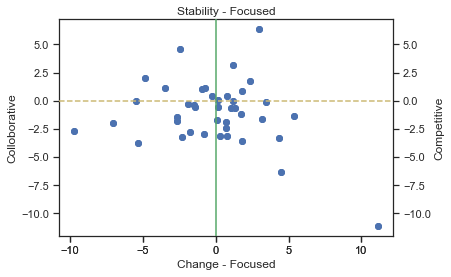

In [206]:
fig1 = figure()
from pylab import figure, show, legend, ylabel, xlabel 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = plt.scatter(cross2['X-Co'], cross2['Y-Co'])
ylabel("Competitive")


ax2 = fig1.add_subplot(111, frameon=False)
ax1.yaxis.tick_right()
line1 = plt.scatter(cross2['X-Co'], cross2['Y-Co'])
ax1.yaxis.set_label_position("right")

ylabel("Colloborative")

xlabel("Change - Focused")

ax1.set_xlabel('Stability - Focused')    
ax1.xaxis.set_label_position('top') 

plt.axvline(x=0, color='g')
plt.axhline(y=0, color='y', linestyle='--')

# 2) Clustering

## Using the the DataFrame 't' created earlier 

# Defining a function to calculate mean 

In [210]:
def con(df):
    for j in range(1,len(df.columns)):
        df[j]=df[j].astype(float)
    
    return(df.loc[:, df.columns != 0].mean())

# Steps:

### For every user in 't' and for every word in 'Clean_Desc', I am splitting into a dataframe named 'g'.

### This 'g' keeps changing as per the loop

### The 'g' is mapped with 'glov4' to get the vector 

### The average of the vectors is calculated from the function 'con'

In [214]:
f=[]
for i in range(len(t)):
    g = pd.DataFrame(t['Clean_Desc'][i])
    g[0] = g[0].str.replace(",","").astype(str)
    g[0] = g[0].str.replace(".","").astype(str)
    d= g.merge(glov4, how = 'left', left_on = 0, right_on =0)
    f.append(con(d))


# Getting the 50-Dimensional Vector at each user Level

In [219]:
f= pd.DataFrame(f)
f.index=t.index
f

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
usr,,,,,,,,,,,,,,,,,,,,,
0096bec0-60e4-11e9-b399-bdb07e903a85,0.240879,0.103470,0.240439,-0.011488,0.368484,-0.059498,-0.440930,0.043374,0.039575,0.125114,...,-0.052791,-0.125015,0.129478,0.289811,0.013710,0.041086,-0.072667,0.299958,-0.079925,0.291015
0427d960-d804-11e9-b608-8796c3108e7c,0.276252,0.026314,0.183571,0.005627,0.371409,-0.022660,-0.122275,-0.120759,0.069133,0.168122,...,-0.022823,-0.242440,0.040620,0.324575,-0.169720,-0.057549,-0.002203,0.371320,0.088728,0.165296
0dc04010-d805-11e9-b608-8796c3108e7c,0.295065,0.076317,0.071305,0.000949,0.222488,0.082289,-0.194083,-0.063359,0.121590,0.053690,...,-0.177679,-0.183844,0.058010,0.193146,-0.068111,0.017158,-0.025547,0.495810,0.029176,0.172177
0fa74af0-60e5-11e9-b399-bdb07e903a85,0.347940,-0.001432,0.123191,-0.126849,0.390092,0.003968,-0.263666,0.032825,0.032523,0.252540,...,-0.009884,-0.126930,0.032010,0.256604,0.016171,0.041864,0.015449,0.358132,-0.037866,0.413119
161bbcb0-60e3-11e9-b399-bdb07e903a85,0.362317,0.063269,0.147053,-0.012170,0.382345,0.017499,-0.240001,-0.075666,0.139334,0.305400,...,-0.005112,-0.091475,0.085631,0.417362,0.019877,0.067266,-0.070610,0.336078,0.026806,0.270207
163087c0-60e4-11e9-b399-bdb07e903a85,0.295042,0.080792,0.169349,-0.058350,0.408184,0.034473,-0.173802,-0.007925,-0.041813,0.244835,...,-0.125463,-0.126055,0.088483,0.330375,-0.165928,-0.007639,0.006419,0.400539,0.033811,0.349142
1a8f5130-60e8-11e9-b399-bdb07e903a85,0.340520,0.100405,0.119225,-0.010924,0.320409,0.027210,-0.256267,-0.030158,0.037548,0.082633,...,-0.092537,-0.149032,0.061870,0.295025,-0.047053,0.007220,-0.024843,0.416163,0.003745,0.209595
205b1c50-60e5-11e9-b399-bdb07e903a85,0.354027,0.208187,-0.004190,0.035207,0.518620,-0.043289,-0.107456,0.056552,0.113813,0.203653,...,0.079534,-0.298731,0.069536,0.393626,-0.028843,-0.114885,-0.066415,0.365524,-0.001250,0.249718
29064430-60e3-11e9-b399-bdb07e903a85,0.197301,0.101064,0.029377,-0.144219,0.363768,-0.040479,-0.352623,0.036047,0.004637,0.177785,...,-0.111406,-0.111239,0.068403,0.300833,-0.031174,0.017329,-0.088845,0.353065,0.066919,0.373942


# Merging the User Data and Vectors

In [220]:
final = pd.concat([t, f],axis=1)


In [221]:
final

,Description,Clean_Desc,usr,1,2,3,4,5,6,7,...,41,42,43,44,45,46,47,48,49,50
usr,,,,,,,,,,,,,,,,,,,,,
0096bec0-60e4-11e9-b399-bdb07e903a85,"we need to beat the competition, we need to ma...","[need, beat, competition,, need, make, client,...",0096bec0-60e4-11e9-b399-bdb07e903a85,0.240879,0.103470,0.240439,-0.011488,0.368484,-0.059498,-0.440930,...,-0.052791,-0.125015,0.129478,0.289811,0.013710,0.041086,-0.072667,0.299958,-0.079925,0.291015
0427d960-d804-11e9-b608-8796c3108e7c,"well this is to gain confidence of client, it ...","[well, gain, confidence, client,, imporatn, po...",0427d960-d804-11e9-b608-8796c3108e7c,0.276252,0.026314,0.183571,0.005627,0.371409,-0.022660,-0.122275,...,-0.022823,-0.242440,0.040620,0.324575,-0.169720,-0.057549,-0.002203,0.371320,0.088728,0.165296
0dc04010-d805-11e9-b608-8796c3108e7c,It is a case of single point of failure. While...,"[case, single, point, failure., work, backgrou...",0dc04010-d805-11e9-b608-8796c3108e7c,0.295065,0.076317,0.071305,0.000949,0.222488,0.082289,-0.194083,...,-0.177679,-0.183844,0.058010,0.193146,-0.068111,0.017158,-0.025547,0.495810,0.029176,0.172177
0fa74af0-60e5-11e9-b399-bdb07e903a85,"It makes more sense and seems more convincing,...","[makes, sense, seems, convincing,, best, scena...",0fa74af0-60e5-11e9-b399-bdb07e903a85,0.347940,-0.001432,0.123191,-0.126849,0.390092,0.003968,-0.263666,...,-0.009884,-0.126930,0.032010,0.256604,0.016171,0.041864,0.015449,0.358132,-0.037866,0.413119
161bbcb0-60e3-11e9-b399-bdb07e903a85,"Networking internally is the key to success, G...","[networking, internally, key, success,, going,...",161bbcb0-60e3-11e9-b399-bdb07e903a85,0.362317,0.063269,0.147053,-0.012170,0.382345,0.017499,-0.240001,...,-0.005112,-0.091475,0.085631,0.417362,0.019877,0.067266,-0.070610,0.336078,0.026806,0.270207
163087c0-60e4-11e9-b399-bdb07e903a85,"Do a value proposition before Pricing., A proa...","[value, proposition, pricing.,, proactive, app...",163087c0-60e4-11e9-b399-bdb07e903a85,0.295042,0.080792,0.169349,-0.058350,0.408184,0.034473,-0.173802,...,-0.125463,-0.126055,0.088483,0.330375,-0.165928,-0.007639,0.006419,0.400539,0.033811,0.349142
1a8f5130-60e8-11e9-b399-bdb07e903a85,Look to add value to client. Reiterate that it...,"[look, add, value, client., reiterate, respons...",1a8f5130-60e8-11e9-b399-bdb07e903a85,0.340520,0.100405,0.119225,-0.010924,0.320409,0.027210,-0.256267,...,-0.092537,-0.149032,0.061870,0.295025,-0.047053,0.007220,-0.024843,0.416163,0.003745,0.209595
205b1c50-60e5-11e9-b399-bdb07e903a85,"To build relationships., To demonstrate to the...","[build, relationships.,, demonstrate, client, ...",205b1c50-60e5-11e9-b399-bdb07e903a85,0.354027,0.208187,-0.004190,0.035207,0.518620,-0.043289,-0.107456,...,0.079534,-0.298731,0.069536,0.393626,-0.028843,-0.114885,-0.066415,0.365524,-0.001250,0.249718
29064430-60e3-11e9-b399-bdb07e903a85,"Clients needs come first and foremost., Being ...","[clients, needs, come, first, foremost.,, ethi...",29064430-60e3-11e9-b399-bdb07e903a85,0.197301,0.101064,0.029377,-0.144219,0.363768,-0.040479,-0.352623,...,-0.111406,-0.111239,0.068403,0.300833,-0.031174,0.017329,-0.088845,0.353065,0.066919,0.373942


# Retrieving only the Vector Values

In [222]:
cl = final.iloc[:, 3:53].values
cl

array([[ 0.24087923,  0.10347047,  0.24043914, ...,  0.29995797,
        -0.07992518,  0.29101519],
       [ 0.27625198,  0.02631375,  0.18357065, ...,  0.37132034,
         0.08872803,  0.16529619],
       [ 0.29506467,  0.07631664,  0.07130537, ...,  0.49581001,
         0.02917596,  0.17217682],
       ...,
       [ 0.19630662,  0.0494703 ,  0.10236256, ...,  0.35106788,
         0.05255216,  0.25024636],
       [ 0.33425689,  0.05908803,  0.24679242, ...,  0.43865683,
         0.00735029,  0.23008058],
       [ 0.33914086,  0.14866734,  0.0437361 , ...,  0.46700045,
        -0.15814211,  0.2288701 ]])

# Dendogram and Clustering

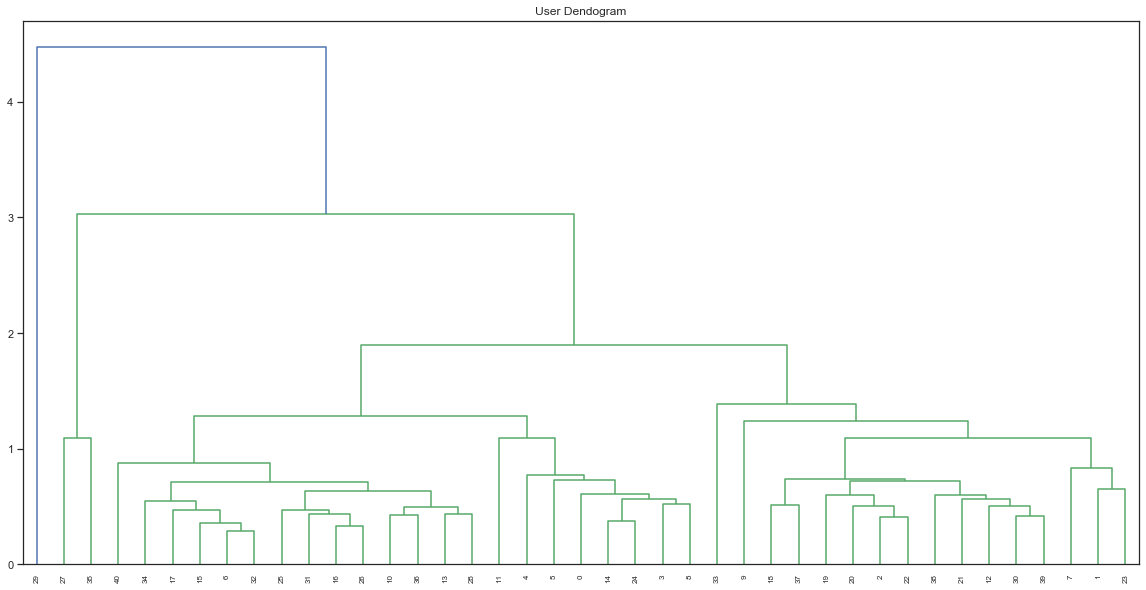

In [223]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("User Dendogram")
dend = shc.dendrogram(shc.linkage(cl, method = 'ward' ))

# Visualizing the clusters 

In [224]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(cl)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 3, 1, 0, 0, 4, 0, 2, 0, 1, 1, 1, 0],
      dtype=int64)

# Picking 2 dimensions from the 50 Dimensions to see a sample t undesratnd how the users have been clustered 

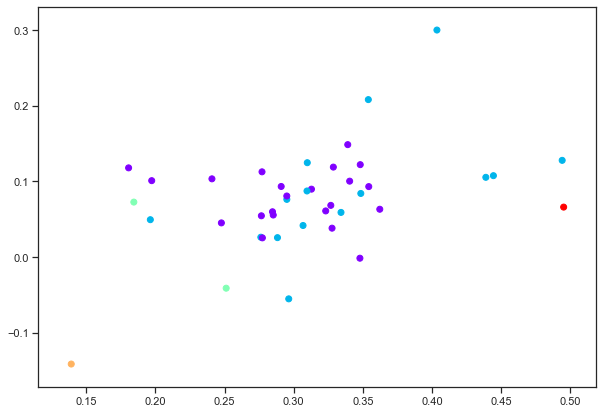

In [225]:
plt.figure(figsize=(10, 7))
plt.scatter(cl[:,0], cl[:,1], c=cluster.labels_, cmap='rainbow')

# Final TakeAways:

- We can see how users  differ their approach when answering to the same scenario
- With the help of the 1 st Axis-Projection, the senior management can track an employee and decipher the secrets of their approach. 
- For Example, if an user is heavily baised towards Competitive and Change, and the organization want to take steps to move the organization in those steps, then this user or the cluster(2 nd Task) of users can help what they are doing in this direaction. 
- Similarly, if an user or a group of them is going in the opposite direction desired, they can be trained accordinglt
- This helps onboarding, monitoring, and understanding the employees in an organization at a much deeper level and with proper overall goals, both the above projections serve as key tools to implement trainings, business decisions

